# Nettoyage des données

## Imports

In [253]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

## Analyse exploratoire des données

In [254]:
data_path='./data/ethical_data.csv'
df = pd.read_csv(data_path)

df.head()

,sport_licence,niveau_etude,region,smoker,revenu_estime_mois,situation_familiale,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret,age_group
0,non,master,regions_touristiques_services,non,857,célibataire,NaN,0.11,615.0,1377.97,13157.101646,60+
1,non,bac,region_parisienne,non,5245,célibataire,2.0,0.79,NaN,10000.00,32408.309272,30-44
2,non,doctorat,regions_touristiques_services,oui,3792,célibataire,0.0,0.13,NaN,5000.00,17975.461375,60+
3,oui,bac,regions_touristiques_services,oui,3291,divorcé,NaN,0.32,NaN,10000.00,16004.737731,60+
4,oui,bac,regions_touristiques_services,non,3893,célibataire,NaN,0.66,NaN,NaN,10437.682760,18-29


In [255]:
df.describe()

,revenu_estime_mois,historique_credits,risque_personnel,score_credit,loyer_mensuel,montant_pret
count,10000.000000,4707.000000,10000.000000,4694.000000,7094.00000,10000.000000
mean,2520.996200,2.543446,0.499094,573.495952,5175.89104,9149.762575
std,1157.532502,1.691198,0.290107,159.140639,3750.61004,10785.937404
min,500.000000,0.000000,0.000000,300.000000,-395.25000,500.000000
25%,1683.000000,1.000000,0.240000,437.000000,985.76750,500.000000
50%,2480.000000,3.000000,0.500000,574.000000,5000.00000,3600.605667
75%,3304.000000,4.000000,0.750000,712.000000,10000.00000,16245.534725
max,6826.000000,5.000000,1.000000,849.000000,10000.00000,53192.053509


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sport_licence        10000 non-null  object 
 1   niveau_etude         10000 non-null  object 
 2   region               10000 non-null  object 
 3   smoker               10000 non-null  object 
 4   revenu_estime_mois   10000 non-null  int64  
 5   situation_familiale  7648 non-null   object 
 6   historique_credits   4707 non-null   float64
 7   risque_personnel     10000 non-null  float64
 8   score_credit         4694 non-null   float64
 9   loyer_mensuel        7094 non-null   float64
 10  montant_pret         10000 non-null  float64
 11  age_group            10000 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 937.6+ KB


<Axes: >

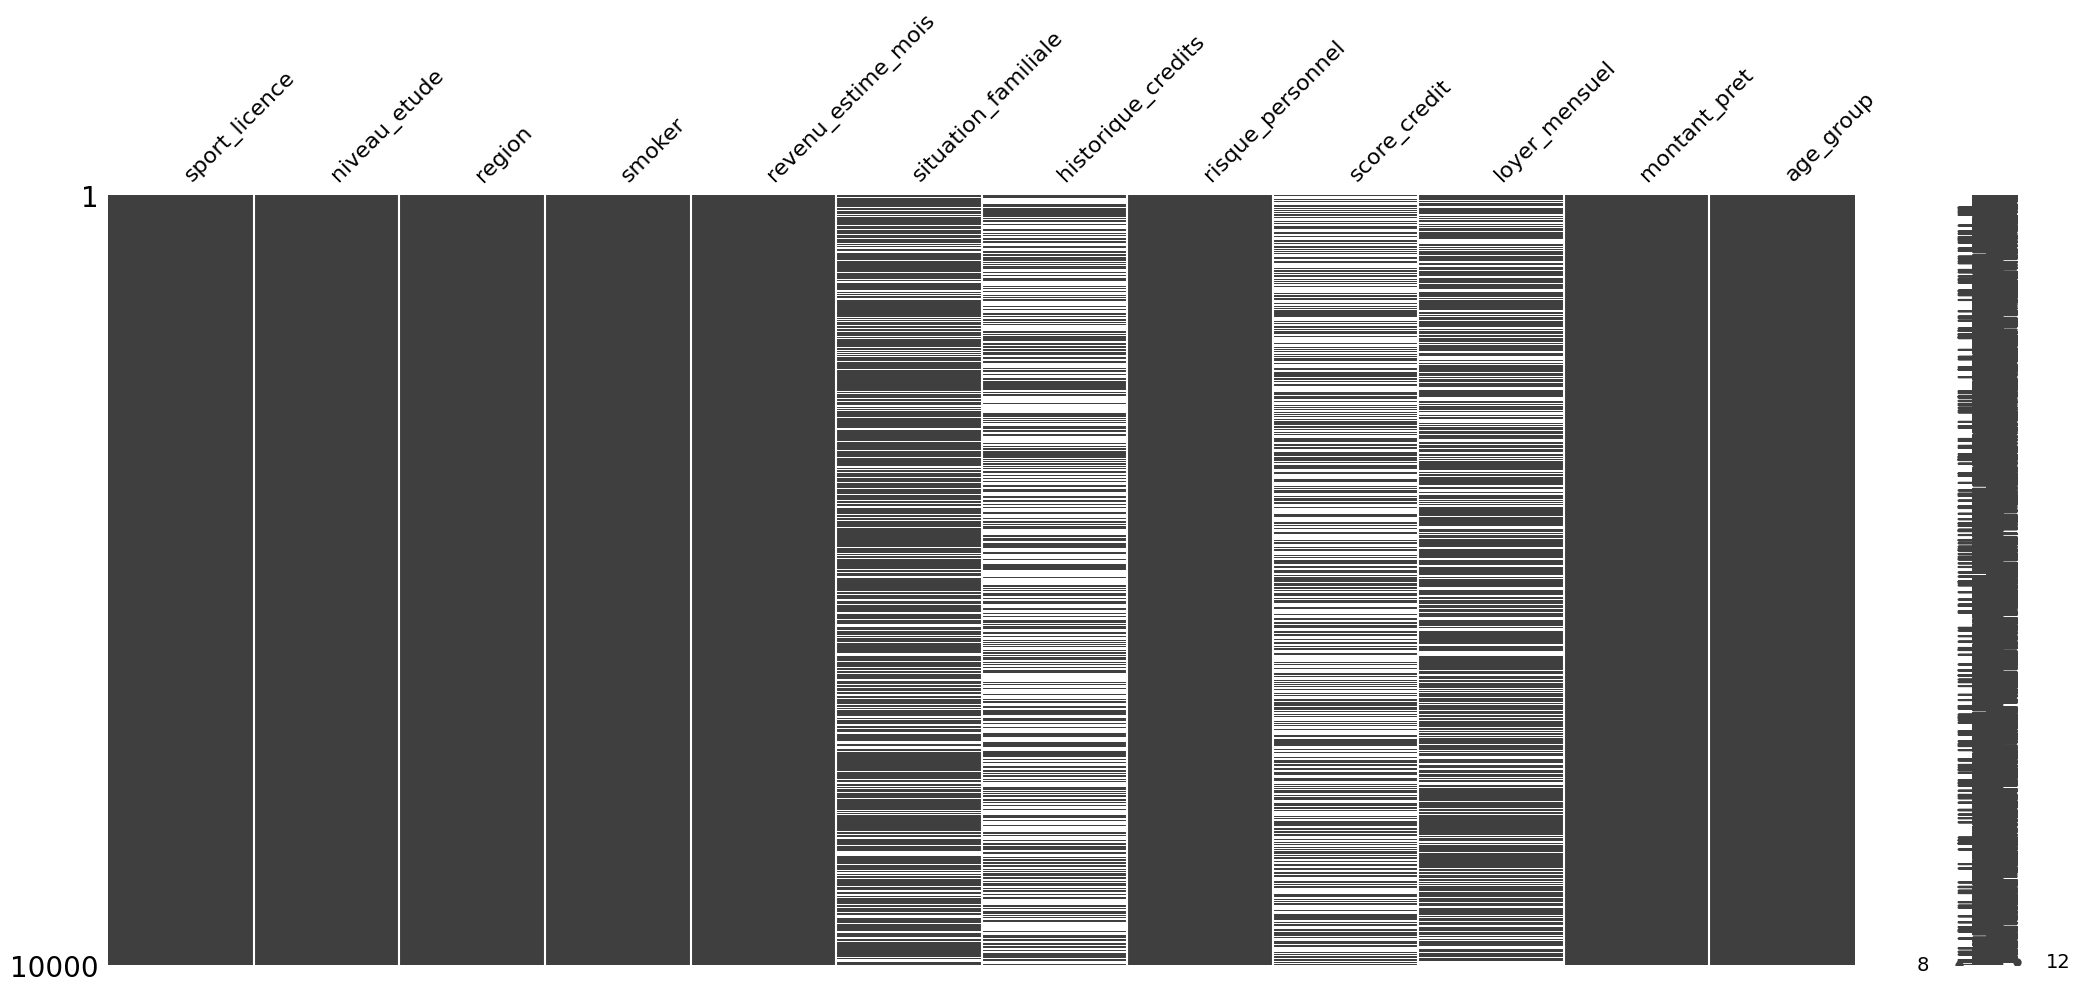

In [257]:
msno.matrix(df)

## Catégorisation des données

In [258]:
numerical_cols = ['revenu_estime_mois', 'risque_personnel', 'loyer_mensuel']
categorical_cols = ['age_group', 'sport_licence', 'niveau_etude', 'region', 'smoker', 'situation_familiale']
empty_cols = ['score_credit', 'historique_credits']
output_col = ['montant_pret']

## Nettoyage des données

### Suppression des conolonnes trop locunaires

In [259]:
df = df.drop(columns=empty_cols)
df.columns

Index(['sport_licence', 'niveau_etude', 'region', 'smoker',
       'revenu_estime_mois', 'situation_familiale', 'risque_personnel',
       'loyer_mensuel', 'montant_pret', 'age_group'],
      dtype='object')

### Imputer les valeurs manquantes

In [260]:
situation_familiale_mode = df['situation_familiale'].mode()
df['situation_familiale'] = df['situation_familiale'].fillna(situation_familiale_mode[0])

loyer_mensuel_mean = df['loyer_mensuel'].mean()
df['loyer_mensuel'] = df['loyer_mensuel'].fillna(loyer_mensuel_mean)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sport_licence        10000 non-null  object 
 1   niveau_etude         10000 non-null  object 
 2   region               10000 non-null  object 
 3   smoker               10000 non-null  object 
 4   revenu_estime_mois   10000 non-null  int64  
 5   situation_familiale  10000 non-null  object 
 6   risque_personnel     10000 non-null  float64
 7   loyer_mensuel        10000 non-null  float64
 8   montant_pret         10000 non-null  float64
 9   age_group            10000 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 781.4+ KB


In [261]:
cols = df.columns.to_list()

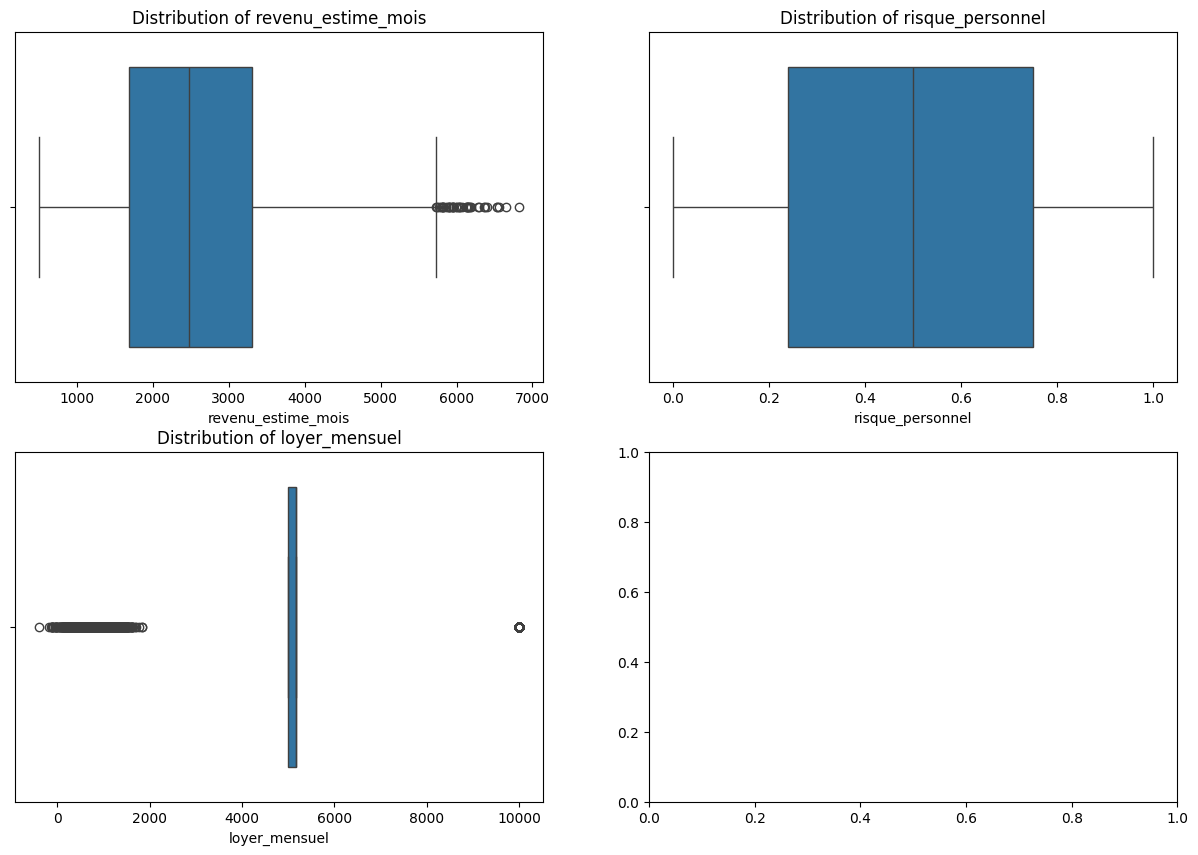

In [262]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.show()

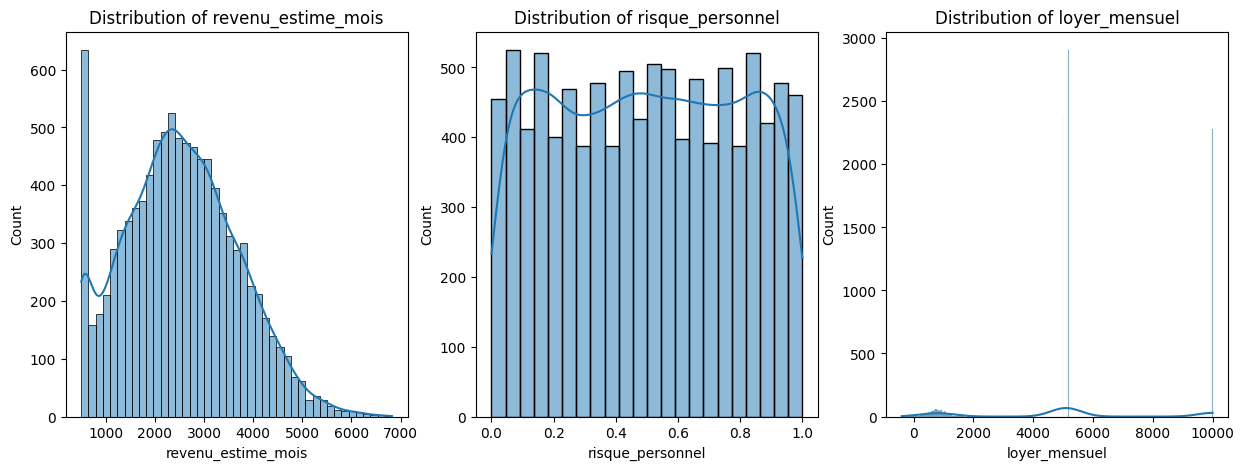

In [263]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.show()

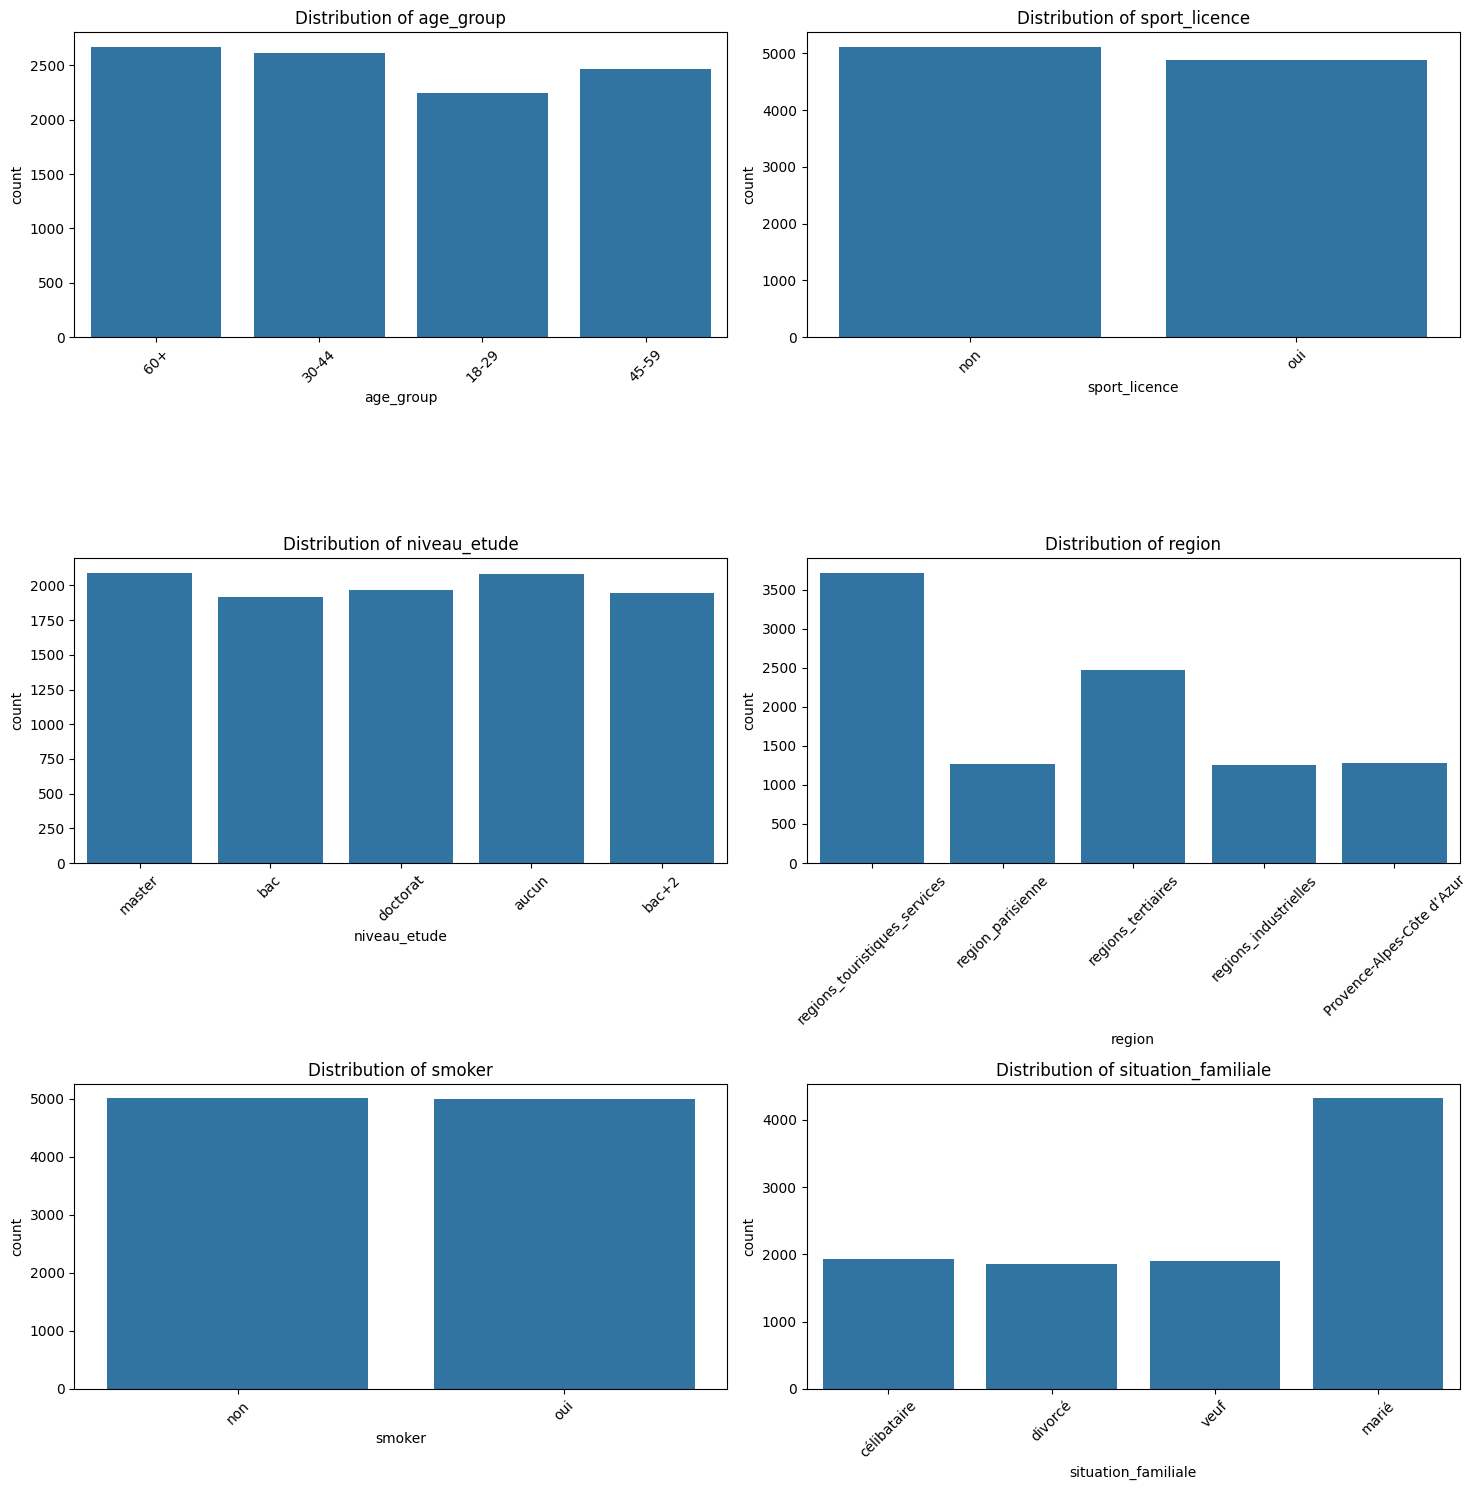

In [264]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    subplot = sns.countplot(data=df, x=col, ax=axes[i])
    subplot.tick_params(axis='x', rotation=45)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Transformation des données catégorielles

In [265]:
df = pd.get_dummies(df, columns=categorical_cols)
df.head()

,revenu_estime_mois,risque_personnel,loyer_mensuel,montant_pret,age_group_18-29,age_group_30-44,age_group_45-59,age_group_60+,sport_licence_non,sport_licence_oui,...,region_region_parisienne,region_regions_industrielles,region_regions_tertiaires,region_regions_touristiques_services,smoker_non,smoker_oui,situation_familiale_célibataire,situation_familiale_divorcé,situation_familiale_marié,situation_familiale_veuf
0,857,0.11,1377.97000,13157.101646,False,False,False,True,True,False,...,False,False,False,True,True,False,True,False,False,False
1,5245,0.79,10000.00000,32408.309272,False,True,False,False,True,False,...,True,False,False,False,True,False,True,False,False,False
2,3792,0.13,5000.00000,17975.461375,False,False,False,True,True,False,...,False,False,False,True,False,True,True,False,False,False
3,3291,0.32,10000.00000,16004.737731,False,False,False,True,False,True,...,False,False,False,True,False,True,False,True,False,False
4,3893,0.66,5175.89104,10437.682760,True,False,False,False,False,True,...,False,False,False,True,True,False,True,False,False,False


## Export du csv nettoyé

In [266]:
df.to_csv('./data/cleaned_data.csv', index=False)